1.넘파이 

파이썬의 핵심 과학 패키지 중 하나로 머신러닝과 딥러닝 패키지가 넘파이를 기반으로 구현되었음.

In [2]:
import numpy as np

## numpy 버전 확인
print(np.__version__)

## array() 함수로 2차원 배월 반들기
my_arr = np.array([[10,20,30],[40,50,60]])
print(my_arr)

## type() 확인
type(my_arr)

## 요소 선택
my_arr[0][2]

## 넘파이 내장함수 사용
np.sum(my_arr)


1.19.5
[[10 20 30]
 [40 50 60]]


210

2.Matplotlib
파이썬 과학 생태계의 표준 그래프 패키지

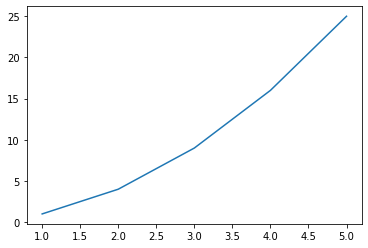

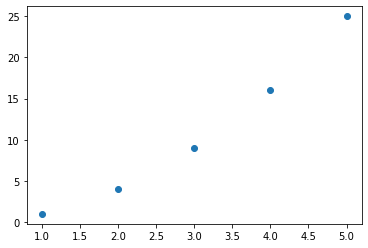

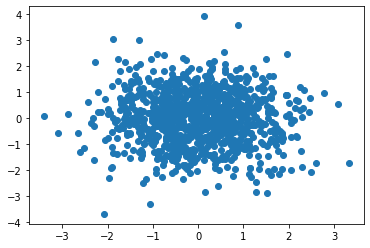

In [3]:
import matplotlib.pyplot as plt

## 선 그래프 그리기 
## x축 y축 값을 파이썬 리스트로 plot() 함수에 전달 
plt.plot([1,2,3,4,5],[1,4,9,16,25])
plt.show()

## 산점도 그리기
plt.scatter([1,2,3,4,5],[1,4,9,16,25])
plt.show()

## 넘파이 배열로 산점도 그리기
x = np.random.randn(1000)
y = np.random.randn(1000)

plt.scatter(x,y)
plt.show()


3.선형 회귀 (linear regression)

y=ax+b

기울기는 a고 절편은 b 
선형 회귀는 기울기와 절편을 찾아 줌.

머신러닝 알고리즘 중 하나

2차원 평면에 놓인 점을 표현하는 1차원 함수의 기울기와 절편을 찾고

찾은 모델을 1차 함수 모델이라고 한다.

선형 회귀 모델로 새 값 x에 대하여 y를 예측할 수 있다.


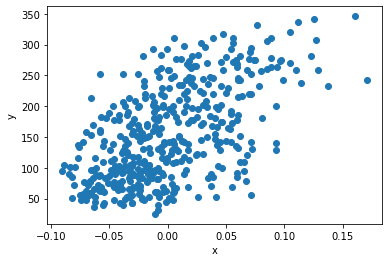

In [5]:

## 당뇨병 환자의 1년 후 병의 진전된 정도를 예측하는 모델 만들기

## 당뇨병 데이터 준비
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

#print(type(diabetes))
#print(diabetes.data.shape, diabetes.target.shape)

## data 442 * 10 크기 2차원 배열, cols:10 (feature), rows:442 (sample) 
## target은 442개의 요소를 가진 1차원 배열
## sample 당뇨병 환자에 대한 특성으로 이루어진 데이터 1 set
## feature 당뇨병 데이터의 여러 특징 independent variable

#print(diabetes.data[0:3])
#print(diabetes.target[:3])

x = diabetes.data[:,2]
y = diabetes.target
## 데이터 시각화 x diabetes.data, y diabetes.target
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 선형 회귀의 목표는 입력 데이터 x와 타깃 데이터 y 를 통해 기울기 a 와 절편 b 를 찾는 것. 즉, 산점도 그래프를 잘 표현하는 직선 방정식 찾는것.
## 경사 하강법 (Gradient descent)은 그 방법 중 하나.
## a 기울기 -> w 가중치나 계수로 표기
## y -> ˆy 와이햇으로 표기 예측 값
## ˆy=wx+b


훈련 데이터에 잘 맞는 w와 b를 찾는 방법

1.무작위로 w와 b를 정함. (무작위로 모델 만들기)

2.x에서 샘플 하나를 선택하여 ^y을 계산 (무작위로 모델 만들기)

3.와이햇과 선택한 샘플의 진짜 y를 비교 (예측한 값과 실제 값 비교하기, 틀릴 확률 99%)

4.와이햇과 y와 더 가까워지도록 w, b를 조정 (모델 조정)

5.모든 샘플을 처리할 때까지 2~4번 항목 반복



In [8]:
## 예측 값으로 올바른 모델 찾기
## 훈련 데이터에(x,y) 잘 맞는 w와 b 찾기

## 1.w,b 초기화

w=1.0
b=1.0

## 2.훈련 데이터의 첫 번째 샘플로 와이햇 얻기
y_hat = x[0]*w+b
print(y_hat)

## 3.타깃과 예측 데이터 비교하기
print(y[0])

## 4.w 값을 조절해 예측값 바꾸기
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

## 5.w 값 조정한 후 예측값 증가 정도 확인
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate) ## 변화율
## y_hat 값이 y 보다 작으면 y_hat 증가 필요, 
## 변화율은 양수이므로 w 값 증가
## 만약 변화율이 음수일 때는 w 값 감소
## 이 방법은 양수와 음수 구분 필요.

## 6.변화율로 가중치 업데이트하기 w와 와이햇에 대한 방정식으로 양수 음수 구분없이 가중치 업데이트
## w+w_rate
w_new = w + w_rate
print(w_new)


## 7.변화율로 절편 업데이트하기
## b+b_rate
b_inc = b + 0.1
y_hat_inc = x[0]*w+b_inc
print(y_hat)

b_rate = (y_hat_inc - y_hat) / (b_inc-b)
print(b_rate)
b_new = b + 1
print(b_new)

## 이처럼 수동적인 방법은 와이햇이 y에 한참 미치지 못 하는 값인 경우, w와 y 를 더 큰폭으로 수정할 수 없음.
## y_hat이 y보다 커지면 y_hat을 감소시키지 못함.

1.0616962065186886
151.0
1.0678658271705574
0.061696206518688734
1.0616962065186888
1.0616962065186886
1.0
2.0


911.1983904448475 156.2427820067777
912.9659942787634 121.90308175045963
913.5973364345905 123.39414383177204


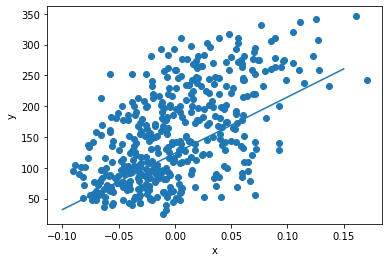

287.8416643899983


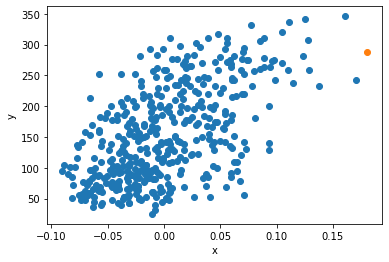

In [17]:
## 가중지와 절편을 더욱 적절하게 업데이트 하는 방법

## 1.오차와 변화율을 곱하여 가중치 업데이트
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print(w_new, b_new)

## 2.두번째 샘플 x[1]을 사용해 오차를 구하고 새로운 w와 b를 구해 보기
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
b_rate = 1
w_new = w_new + w_rate * err
b_new = b_new + b_rate * err
print(w_new,b_new)

## 3.전체 샘플을 반복하기
## zip() 함수는 여러 개의 배열에서 동시에 요소를 하나씩 꺼내 줌
for i in range(1,1000):
  for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
  
print(w,b)

## 4.3번 모델이 전체 dataset에 잘 표현하는지 그래프 그려보기
plt.scatter(x,y)
pt1 = (-0.1,-0.1 * w + b)
pt2 = (0.15,0.15 * w + b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 5.여러 에포크(epoch)를 반복하기
## 전체 훈련 데이터를 모두 이용하여 한 단위의 작업을 진행하는 것 에포크(epoch)
## for문 바깥쪽에 for문 더 씌워서 1000번 반복

## ^y = 913.6x + 123.4

## 6.모델로 예측하기
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

손실 함수

제곱 오차 (squared error)

타깃값과 예측값을 뺀 다음 제곱한 것

SE = (y-^y)2(제곱)



In [ ]:

## 가중치에 대하여 제곱 오차 미분하기
y_hat = x_i * w + b
err = y_i - y_hat
w_rate = x_i
w = w + w_rate * err

## 절편에 대하여 제곱 오차 미분하기
err = y_i - y_hat
b = b + 1 * err

## 손실 함수에 대해 일일이 변화율의 값을 계산하는 대신 편미분을 사용하여 변화율을 계산
## 변화율은 인공지능 분야에서 그레디언트(gradient,경사)라고 부릅니다.


4.선형회귀를 위한 뉴런 만들기


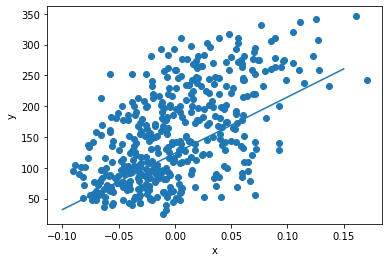

In [20]:
## Neuron class 만들기
## 경사 하강법 알고리즘 Neuron 또는 unit

class Neuron:

  ## 초기화 작업 수행  
  ## 1.필요한 변수 선언
  def __init__(self):
    self.w = 1.0  # 가중치를 초기화
    self.b = 1.0  # 절편을 초기화
  
  ## 필요한 메서드 추가
  ## 2.정방향 계산 만들기
  def forpass(self, x):
    y_hat = x * self.w + self.b # 직선 방적식을 계산
    return y_hat
  ## 3.역방향 계산 만드리
  def backprop(self, x, err):
    w_grad = x * err  # 가중치에 대한 그레이디언트를 계산
    b_grad = 1 * err  # 절편에 대한 그레이디언트를 계산
    return w_grad, b_grad
  
  ## 4.훈련을 위한 fit() 메서드 구현
  ## forpass() 메서드를 호출하여 와이햇 값을 구함 
  ## > 그 다음 오차(err) 계산
  ## > backprop() 메서드를 호출하여 가중치와 절편에 대한 그레이디언트를 구함.
  ## > 그레이디언트를 가중치와 절편에서 빼면 가중치와 절편의 업데이트가 끝남
  ## > 적정한 가중치가 구해질 만큼 에포크 반복

  def fit(self, x, y, epochs=100):
    for i in range(epochs):       # epochs만큼 반복
      for x_i, y_i in zip(x,y):   # 모든 샘플에 대해 반복
        y_hat = self.forpass(x_i) # 정방향 계산
        err = -(y_i - y_hat)      # 오차 계산
        w_grad, b_grad = self.backprop(x_i,err) # 역방향 계산
        self.w -= w_grad  # 가중치 업데이트
        self.b -= b_grad  # 절편 업데이트

## 5.모델 훈련하기(학습 시키기)

neuron = Neuron()
neuron.fit(x,y)

## 6.모델의 가중치와 절편 확인
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15,0.15 * neuron.w + neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()